In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report
sns.set()
np.random.seed(2224)
%matplotlib inline

In [17]:
data_dir="./data/img-classification/tensorfood"

In [6]:
physical_devices = tf.config.experimental.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.gpu.per_process_gpu_memory_fraction = 0.9

In [7]:
labels=[]
img_path=[]
for label in os.listdir(data_dir):
    if not label.startswith("."):
        for fp in os.listdir(f"{data_dir}/{label}"):
            if not fp.startswith("."):
                labels.append(label)
                img_path.append(fp)

In [8]:
df=pd.DataFrame({"labels":labels,"img_path":img_path})

In [9]:
df["format"]=df.apply(lambda x: Image.open(f"{data_dir}/{x[0]}/{x[1]}").format,axis=1)
df["mode"]=df.apply(lambda x: Image.open(f"{data_dir}/{x[0]}/{x[1]}").mode,axis=1)
df["dimension"]=df.apply(lambda x: Image.open(f"{data_dir}/{x[0]}/{x[1]}").size,axis=1)
df["width"]=df["dimension"].apply(lambda x: x[0])
df["height"]=df["dimension"].apply(lambda x: x[1])
df["channels"]=df.apply(lambda x: Image.open(f"{data_dir}/{x[0]}/{x[1]}").getbands(),axis=1)
df["num_channels"]=df["channels"].apply(lambda x : len(x))


In [10]:
df.head()

labels                           img_path format mode    dimension  \
0  chilli_crab  1-singapore-chilli-crab-sauce.jpg   JPEG  RGB  (1000, 500)   
1  chilli_crab  10-002-singapore-chilli-crab-.jpg   JPEG  RGB   (700, 500)   
2  chilli_crab  100-item-2-thumbnail-carousel.jpg   JPEG  RGB   (740, 416)   
3  chilli_crab                  101-hqdefault.jpg   JPEG  RGB   (480, 360)   
4  chilli_crab  104-chilli-crab-picture-csp31.jpg   JPEG  RGB   (450, 320)   

   width  height   channels  num_channels  
0   1000     500  (R, G, B)             3  
1    700     500  (R, G, B)             3  
2    740     416  (R, G, B)             3  
3    480     360  (R, G, B)             3  
4    450     320  (R, G, B)             3

In [11]:
df["labels"].value_counts(sort=False,ascending=False)

chilli_crab        102
nasi_ayam           85
popiah             101
curry_puff         105
satay              102
tau_huay            64
dim_sum            171
kaya_toast         100
roti_prata         101
wanton_noodle      100
sambal_stingray    103
ice_kacang          90
Name: labels, dtype: int64

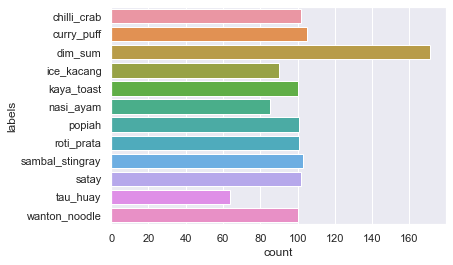

In [12]:
sns.countplot(data=df,y="labels")
#plt.xticks(rotation=90)
plt.show()

In [13]:
df["format"].value_counts()

JPEG    1183
PNG       37
MPO        4
Name: format, dtype: int64

In [14]:
df["mode"].value_counts()

RGB     1202
RGBA      18
P          3
CMYK       1
Name: mode, dtype: int64

In [15]:
df["channels"].value_counts()

(R, G, B)       1202
(R, G, B, A)      18
(P,)               3
(C, M, Y, K)       1
Name: channels, dtype: int64

<AxesSubplot:xlabel='width', ylabel='height'>

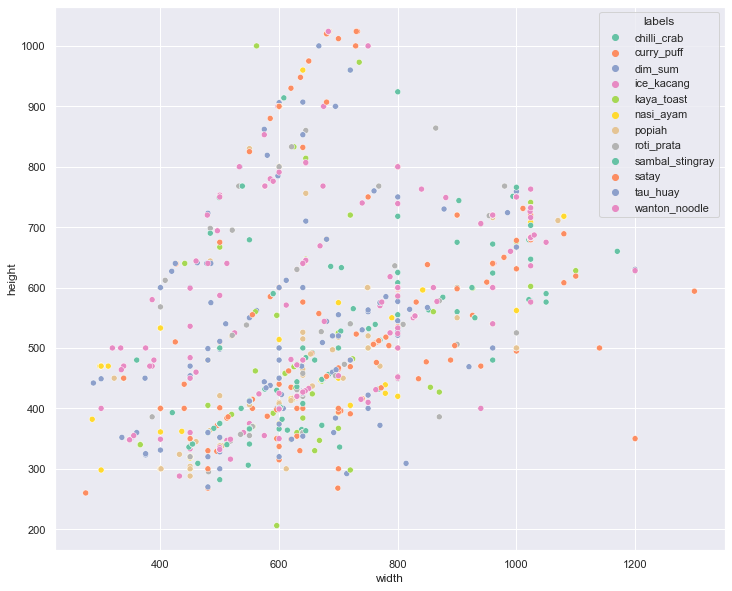

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df,x="width",y="height",hue="labels",palette="Set2")

In [18]:
chilli_crab_imgs=[fn for fn in os.listdir(f"{data_dir}/chilli_crab") if not fn.startswith(("."))]
curry_puff_imgs=[fn for fn in os.listdir(f"{data_dir}/curry_puff") if not fn.startswith(("."))]
dim_sum_imgs=[fn for fn in os.listdir(f"{data_dir}/dim_sum") if not fn.startswith(("."))]
ice_kacang_imgs=[fn for fn in os.listdir(f"{data_dir}/ice_kacang") if not fn.startswith(("."))]
kaya_toast_imgs=[fn for fn in os.listdir(f"{data_dir}/kaya_toast") if not fn.startswith(("."))]
nasi_ayam_imgs=[fn for fn in os.listdir(f"{data_dir}/nasi_ayam") if not fn.startswith(("."))]
popiah_imgs=[fn for fn in os.listdir(f"{data_dir}/popiah") if not fn.startswith(("."))]
roti_prata_imgs=[fn for fn in os.listdir(f"{data_dir}/roti_prata") if not fn.startswith(("."))]
sambal_stingray_imgs=[fn for fn in os.listdir(f"{data_dir}/sambal_stingray") if not fn.startswith(("."))]
satay_imgs=[fn for fn in os.listdir(f"{data_dir}/satay") if not fn.startswith(("."))]
tau_huay_imgs=[fn for fn in os.listdir(f"{data_dir}/tau_huay") if not fn.startswith(("."))]
wanton_noodle_imgs=[fn for fn in os.listdir(f"{data_dir}/wanton_noodle") if not fn.startswith(("."))]

In [19]:
foods_imgs=[chilli_crab_imgs,curry_puff_imgs,dim_sum_imgs,ice_kacang_imgs,kaya_toast_imgs,nasi_ayam_imgs,popiah_imgs,roti_prata_imgs,sambal_stingray_imgs,satay_imgs,tau_huay_imgs,wanton_noodle_imgs]
food_items=["chilli_crab","curry_puff","dim_sum","ice_kacang","kaya_toast","nasi_ayam","popiah","roti_prata","sambal_stingray","satay","tau_huay","wanton_noodle"]


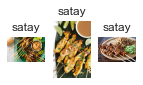

In [19]:
# randomly select 10 pic to test

satay_3 = np.random.choice(satay_imgs,3,replace=False)

fig = plt.figure(figsize=(8,6))
for i in range(3):
    fp = f"{data_dir}/satay/{satay_3[i]}"
    label = "satay"
    ax = fig.add_subplot(1,10,i+1)
    
    fn = image.load_img(fp)
    plt.imshow(fn)
    plt.title(label)
    plt.axis("off")
plt.show() # seems that the image all have different resolutions

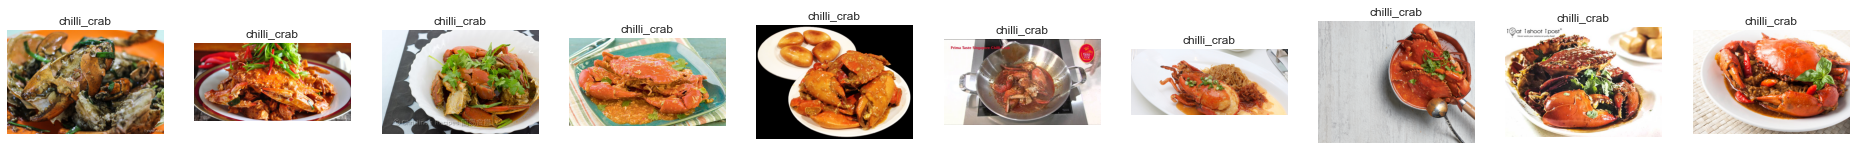

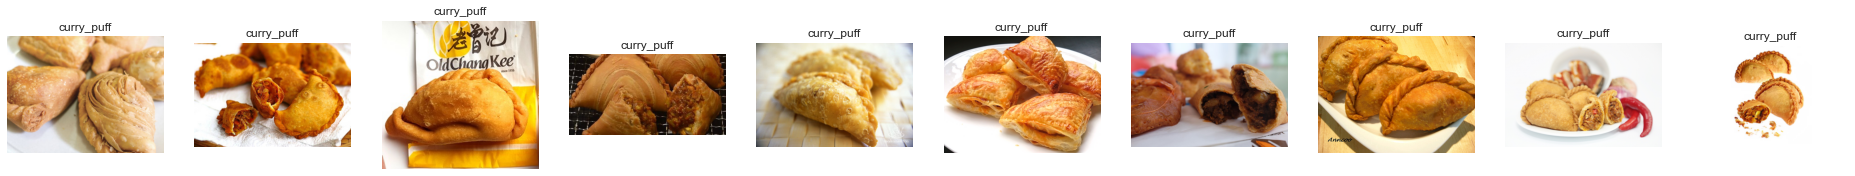

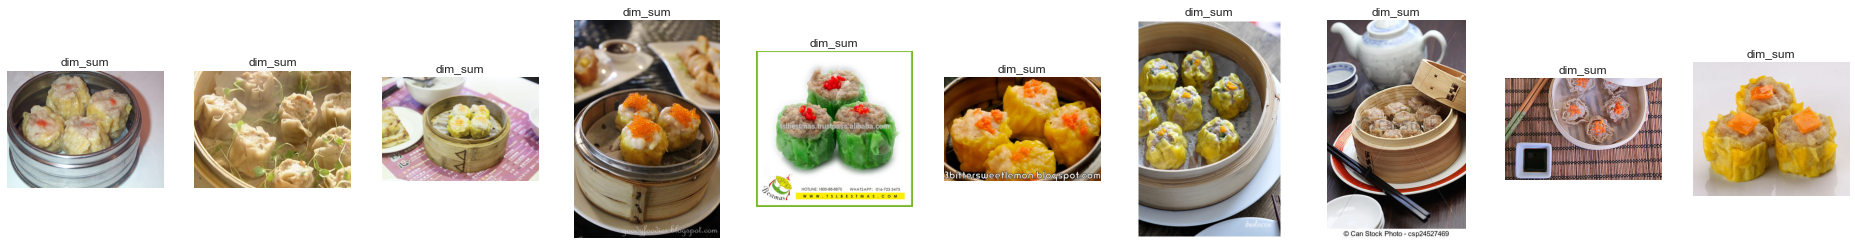

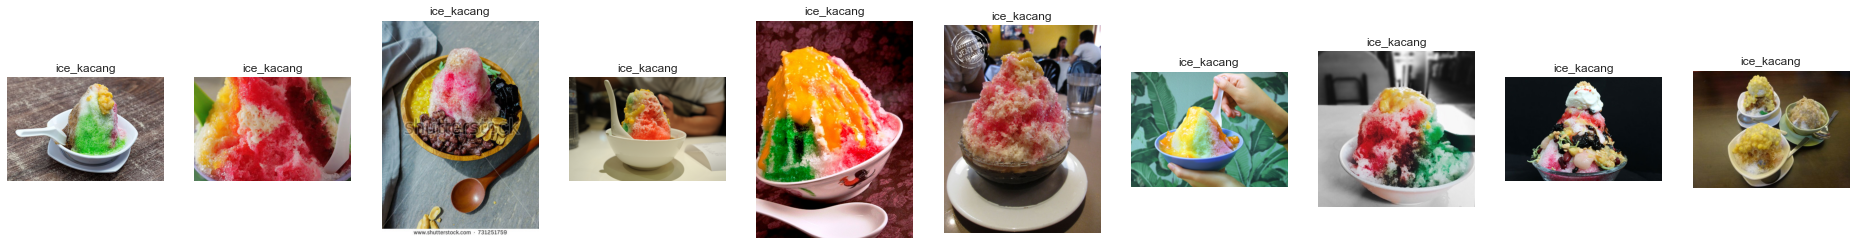

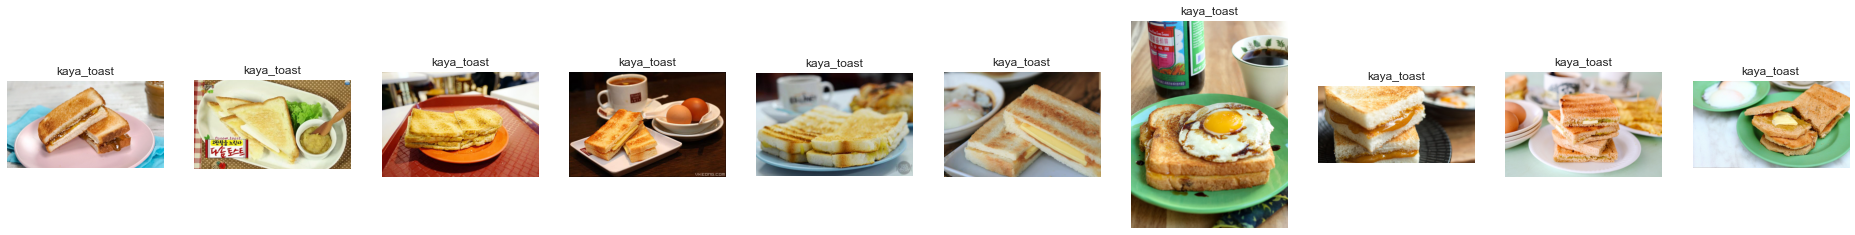

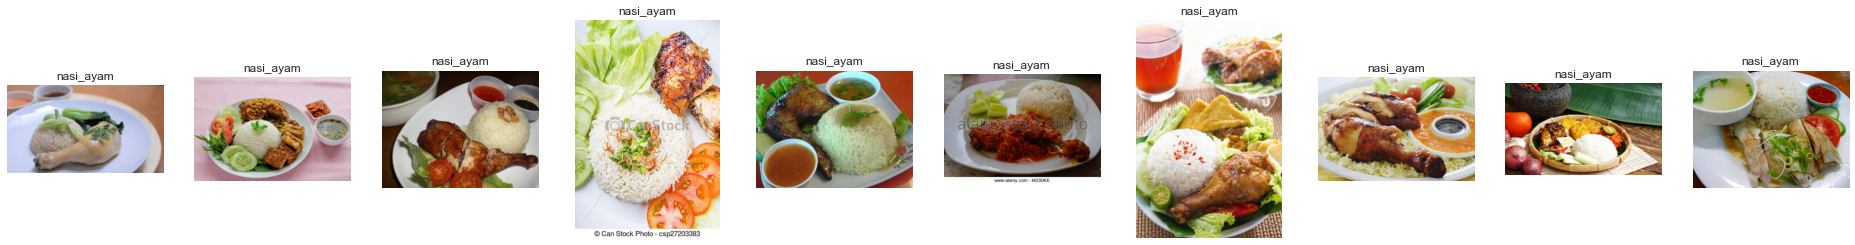

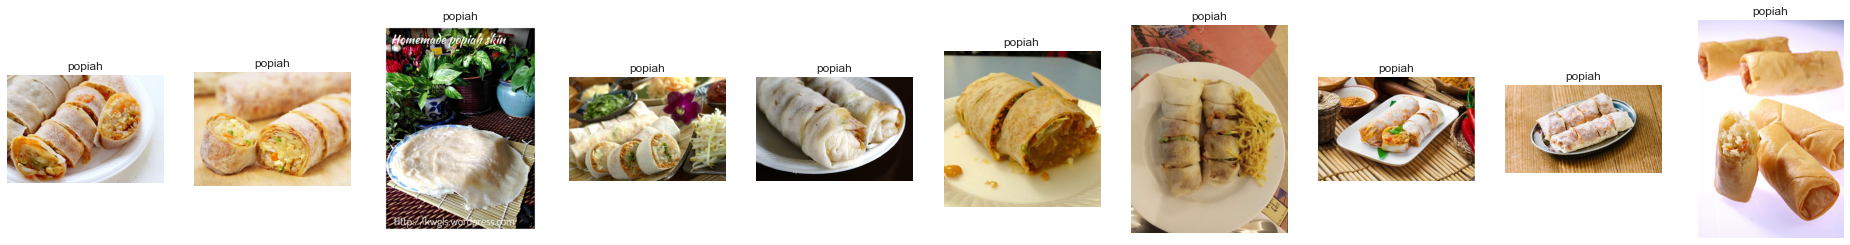

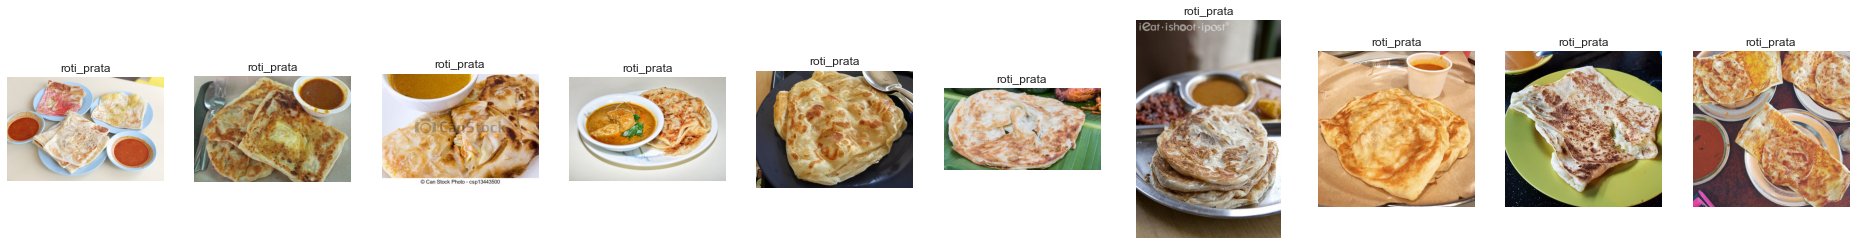

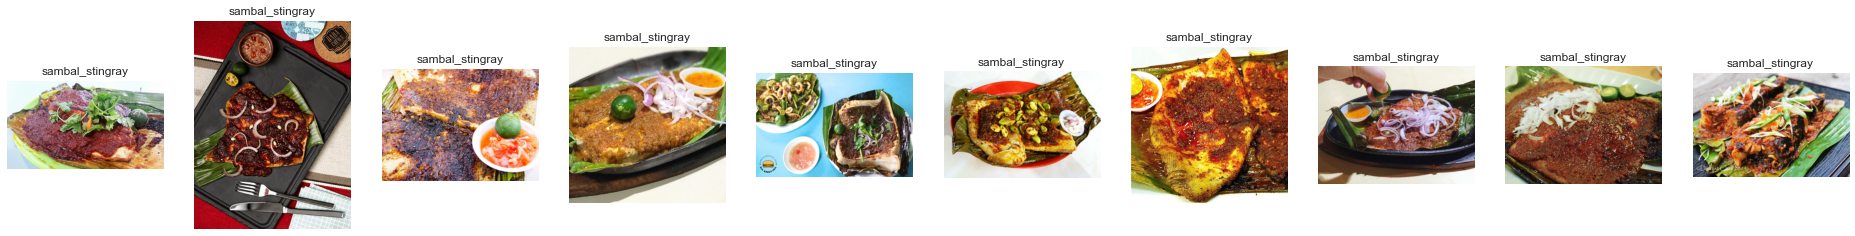

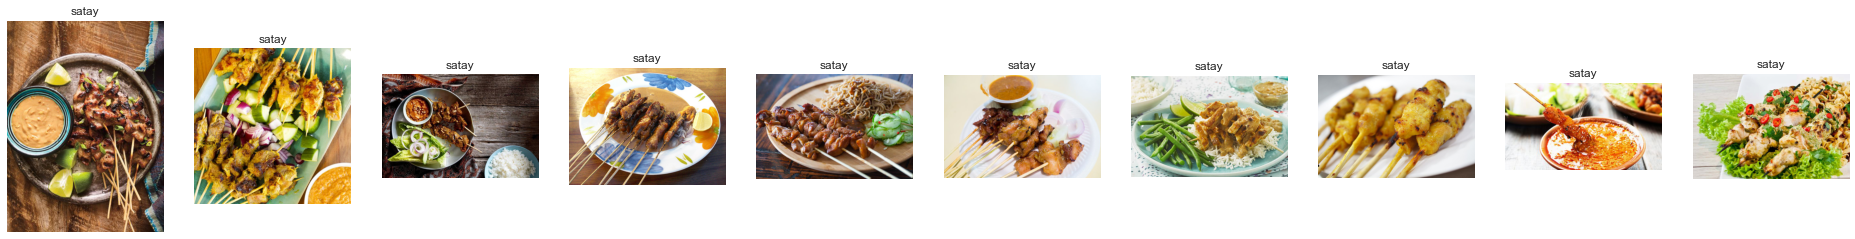

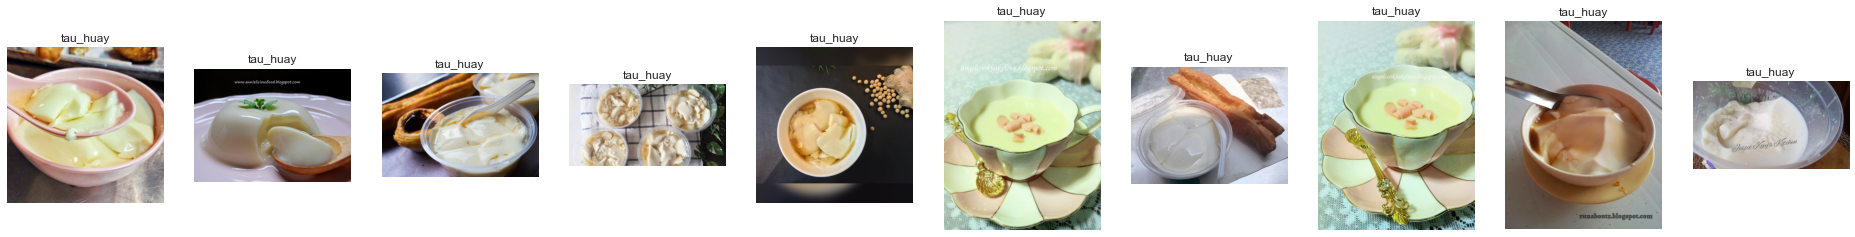

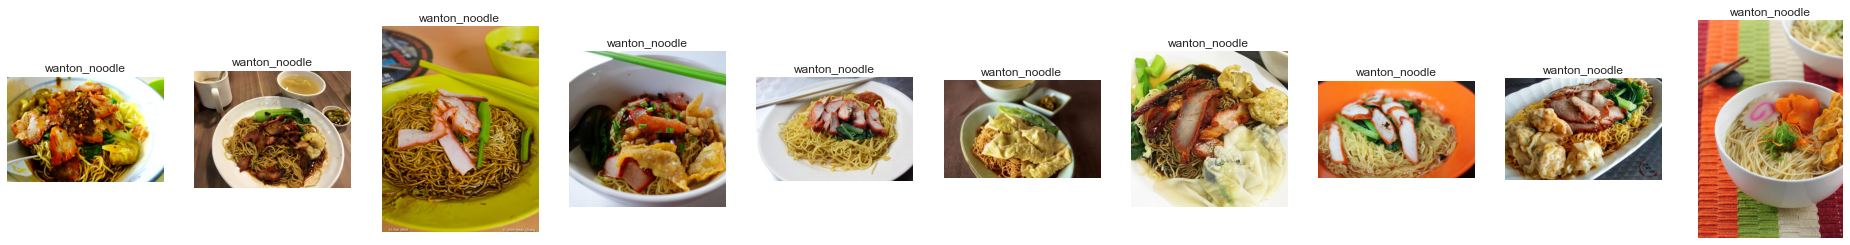

In [20]:
for foods,name in zip(foods_imgs,food_items):
    food_10 = np.random.choice(foods,10,replace=False)
    fig = plt.figure(figsize=(33,4))
    for i in range(10):
        fp = f"{data_dir}/{name}/{food_10[i]}"
        label = name
        ax = fig.add_subplot(1,10,i+1)
        fn=image.load_img(fp)
        plt.imshow(fn)
        plt.title(label)
        plt.axis("off")
    plt.show()

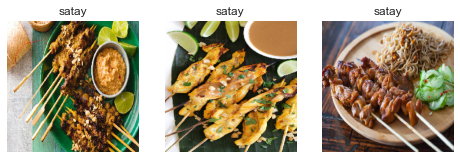

In [21]:
fig = plt.figure(figsize=(8,6))
for i in range(3):
    fp = f"{data_dir}/satay/{satay_3[i]}"
    label = "satay"
    ax = fig.add_subplot(1,3,i+1)
    
    fn = image.load_img(fp,target_size = (224,224))
    plt.imshow(fn)
    plt.title(label)
    plt.axis("off")
plt.show() # if i resize the pic, some of it looks distorted

## Findings 
- dim sum has the most count at 171 and tau huey has the least at 64 the others have around 100
- most images are RGB , with a handful of RGBA , P and CMYK
- most images are in JPEP format


- I oberved that the food items are found i various orientations, so i think augmenting the dataset with rotation,flipping maybe a good idea.
- Since the food items sometimes are paired with other food items, will random cut out work to make the model learn more on the overal features



#### Split into train and test set

In [7]:
VALIDATION_SPLIT=0.2
BATCH_SIZE=8
EPOCHS=20

In [23]:
datagen=image.ImageDataGenerator(rescale=1./255,validation_split=VALIDATION_SPLIT)



In [24]:
train_gen=datagen.flow_from_directory(data_dir,
                                  target_size=(224,224),
                                  subset="training",
                                  batch_size=BATCH_SIZE,
                                  class_mode='categorical',
                                  seed=37,
                                  shuffle=True
                                 )
test_gen=datagen.flow_from_directory(data_dir,
                                 target_size=(224,224),
                                 subset="validation",
                                 batch_size=BATCH_SIZE,
                                 class_mode='categorical',
                                 shuffle=True,
                                 seed=37
                                 )

Found 982 images belonging to 12 classes.
Found 242 images belonging to 12 classes.


#### Use pretrained model such as ResNet50V2 for model training use case

In [25]:
base_model=ResNet50V2(include_top=False,weights="imagenet",input_shape=(224,224,3))
pool=GlobalAveragePooling2D()(base_model.layers[-1].output)
fc2=Dense(512,activation="relu")(pool)
output=Dense(12,activation="softmax")(fc2)
model=Model(inputs=base_model.input,outputs=output)
base_model.trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [26]:
optimizer=tf.keras.optimizers.RMSprop(lr=0.01)
early_stop=[EarlyStopping(monitor="val_loss",min_delta=1e-2,patience=10)]
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])


In [27]:
early_stop=[EarlyStopping(monitor="val_loss",min_delta=1e-2,patience=10)]
history=model.fit(train_gen,
                  steps_per_epoch=len(train_gen),
                  epochs=EPOCHS,
                  validation_data=test_gen,
                  validation_steps=len(test_gen),
                  callbacks=early_stop
                 )

Train for 123 steps, validate for 31 steps
Epoch 1/20
123/123 [==============================] - 24s 191ms/step - loss: 4.8352 - accuracy: 0.4114 - val_loss: 1.5913 - val_accuracy: 0.7066
Epoch 2/20
123/123 [==============================] - 17s 137ms/step - loss: 1.4368 - accuracy: 0.6874 - val_loss: 3.6213 - val_accuracy: 0.6033
Epoch 3/20
123/123 [==============================] - 17s 138ms/step - loss: 0.8290 - accuracy: 0.7933 - val_loss: 3.4885 - val_accuracy: 0.6736
Epoch 4/20
123/123 [==============================] - 17s 137ms/step - loss: 0.6672 - accuracy: 0.8503 - val_loss: 8.6150 - val_accuracy: 0.5785
Epoch 5/20
123/123 [==============================] - 17s 137ms/step - loss: 0.3926 - accuracy: 0.9145 - val_loss: 6.9371 - val_accuracy: 0.6198
Epoch 6/20
123/123 [==============================] - 17s 137ms/step - loss: 0.3441 - accuracy: 0.9399 - val_loss: 6.1104 - val_accuracy: 0.7025
Epoch 7/20
123/123 [==============================] - 17s 137ms/step - loss: 0.4313 - a

In [28]:
predict=model.predict(test_gen,steps=len(test_gen))

In [29]:
predict_class=[np.argmax(y) for y in predict]

In [30]:
import math
test_set_total=len(test_gen.filenames)
number_of_generator_calls = math.ceil(test_set_total / (BATCH_SIZE))
test_labels = []
for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_gen[i][1]))


In [31]:
test_labels=np.array(test_labels)

In [32]:
test_class=[np.argmax(y) for y in test_labels]

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test_class,predict_class))

              precision    recall  f1-score   support

           0       0.33      1.00      0.49        20
           1       0.87      0.62      0.72        21
           2       0.91      0.94      0.93        34
           3       0.94      0.83      0.88        18
           4       0.79      0.55      0.65        20
           5       0.58      0.65      0.61        17
           6       1.00      0.65      0.79        20
           7       0.69      0.90      0.78        20
           8       1.00      0.10      0.18        20
           9       0.76      0.65      0.70        20
          10       1.00      0.33      0.50        12
          11       0.80      0.80      0.80        20

    accuracy                           0.69       242
   macro avg       0.81      0.67      0.67       242
weighted avg       0.81      0.69      0.69       242



In [34]:
confusion_matrix(test_class,predict_class)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6, 13,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  0,  0, 15,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0, 11,  1,  0,  2,  0,  3,  0,  0],
       [ 5,  0,  0,  0,  0, 11,  0,  1,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  1, 13,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  1,  0,  0,  0, 18,  0,  0,  0,  0],
       [13,  0,  0,  0,  0,  2,  0,  1,  2,  1,  0,  1],
       [ 4,  0,  1,  0,  0,  1,  0,  0,  0, 13,  0,  1],
       [ 0,  0,  0,  0,  3,  1,  0,  4,  0,  0,  4,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16]], dtype=int64)

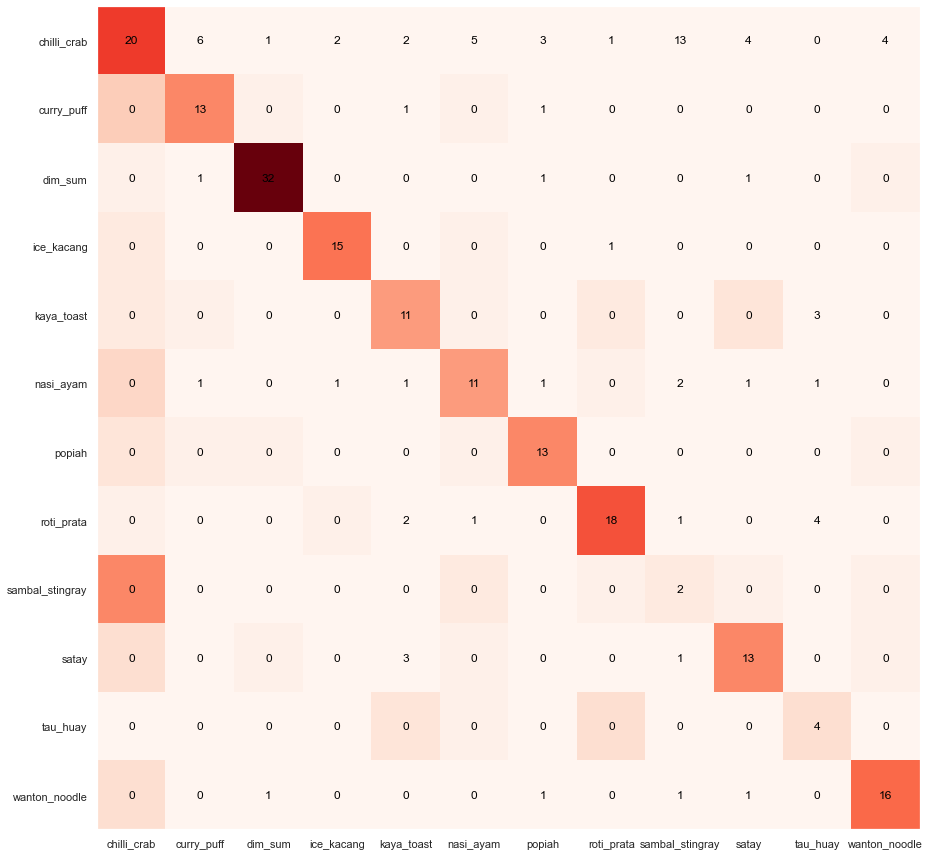

In [35]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1)
conf_mat = confusion_matrix(test_class,predict_class)
#sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=0.05,cmap="Reds",fmt="3.0f")
im=ax.imshow(conf_mat,cmap="Reds")
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_xticklabels(food_items)
ax.set_yticklabels(food_items)
ax.grid(False)

for i in range(12):
    for j in range(12):
        text = ax.text(i, j, conf_mat[i, j],
                       ha="center", va="center", color="black",fontsize="large")
fig.tight_layout()        
plt.show()

In [36]:
predict_train=model.predict(train_gen,steps=len(train_gen))
predict_class_train=[np.argmax(y) for y in predict_train]

In [37]:
train_set_total=len(train_gen.filenames)
number_of_generator_calls_train = math.ceil(train_set_total / (BATCH_SIZE))
train_labels = []
for i in range(0,int(number_of_generator_calls_train)):
    train_labels.extend(np.array(train_gen[i][1]))
train_labels=np.array(train_labels)
train_class=[np.argmax(y) for y in train_labels]

In [38]:
confusion_matrix(train_class, predict_class_train)

array([[ 81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [ 13,  57,   5,   1,   0,   4,   0,   4,   0,   0,   0,   0],
       [  1,   0, 135,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   2,  69,   0,   1,   0,   0,   0,   0,   0,   0],
       [  3,   2,   1,   1,  58,   7,   0,   6,   0,   2,   0,   0],
       [ 15,   0,   2,   2,   0,  42,   0,   5,   0,   2,   0,   0],
       [  4,   3,   2,   0,   2,   9,  56,   3,   0,   2,   0,   0],
       [  3,   0,   2,   0,   0,   0,   0,  73,   0,   0,   0,   3],
       [ 40,   0,   3,   2,   0,  21,   0,   1,  14,   2,   0,   0],
       [ 18,   0,   1,   1,   0,   0,   0,   0,   0,  60,   0,   2],
       [  0,   0,   4,   2,   6,   6,   0,  12,   0,   0,  19,   3],
       [ 17,   0,   2,   1,   0,   3,   0,   0,   0,   0,   0,  57]],
      dtype=int64)

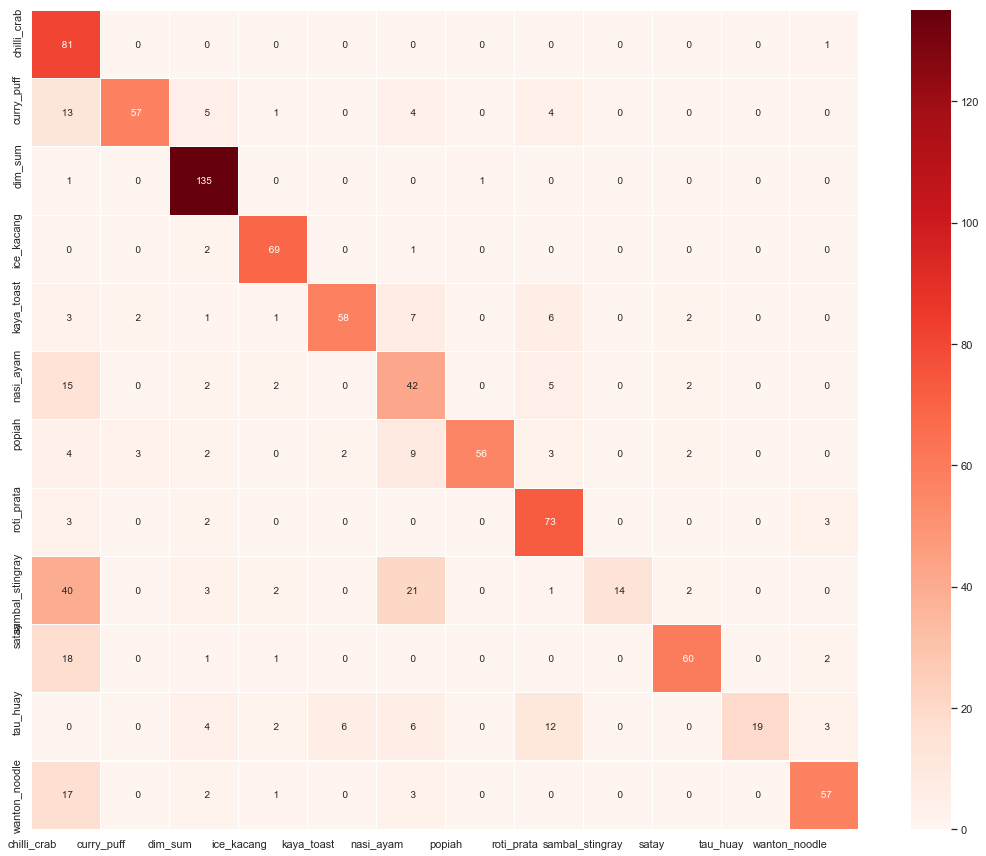

In [39]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1)
conf_mat = confusion_matrix(train_class, predict_class_train)
sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=0.05,cmap="Reds",fmt="3.0f")
#im=ax.imshow(conf_mat,cmap="Reds")
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_xticklabels(food_items)
ax.set_yticklabels(food_items)
ax.grid(False)

#for i in range(12):
#    for j in range(12):
#        text = ax.text(i, j, conf_mat[i, j],
#                       ha="center", va="center", color="black",fontsize="large")
fig.tight_layout()        
plt.show()

#### Model improvement and tuning
Improve model learning capabilities by utilising data augmentation on training images (982 training images)

In [3]:
def cut_out(img_arr,cutout_size_ratio=(0.1,0.2)):
    import random
    import numpy as np
    np.random.seed(2224)
    
    img=img_arr.copy()
    h ,w ,_ = img_arr.shape
    min_ratio , max_ratio=cutout_size_ratio
    ratio=random.randint(min_ratio*100,max_ratio*100)/100
    bigger_dim= max(h,w)
    cutout_size=int(bigger_dim*ratio)
    
    cut_w=random.randint(0,w-1-cutout_size)
    cut_h=random.randint(0,h-1-cutout_size)
    for i in range(cutout_size):
        for j in range(cutout_size):
            img[cut_h+i][cut_w+j]=np.array([0,0,0])
    return img

In [41]:
datagen2_train=image.ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  #horizontal_flip=True,
                                  #vertical_flip=True,
                                  preprocessing_function=cut_out,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  validation_split=VALIDATION_SPLIT)

train_gen2=datagen2_train.flow_from_directory(data_dir,
                                  target_size=(224,224),
                                  subset="training",
                                  batch_size=BATCH_SIZE,
                                  shuffle=True,
                                  class_mode="categorical",
                                  seed=2224
                                  )
                                  #save_to_dir="./data/augmented_image",
                                  #save_prefix="aug",
                                  #save_format="jpeg",
                                  
datagen2_test=image.ImageDataGenerator(rescale=1./255,
                                       validation_split=VALIDATION_SPLIT)                                 

test_gen2=datagen2_test.flow_from_directory(data_dir,
                                 target_size=(224,224),
                                 subset="validation",
                                 batch_size=BATCH_SIZE,
                                 class_mode="categorical",
                                 shuffle=True,
                                 seed=2224
                                 )

Found 982 images belonging to 12 classes.
Found 242 images belonging to 12 classes.


In [42]:
base_model2=ResNet50V2(include_top=False,weights="imagenet",input_shape=(224,224,3))
pool_2=GlobalAveragePooling2D()(base_model2.layers[-1].output)
fc2_2=Dense(512,activation="relu")(pool_2)
output_2=Dense(12,activation="softmax")(fc2_2)
model2=Model(inputs=base_model2.input,outputs=output_2)
base_model2.trainable = False
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [43]:
model2.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [44]:
history2 = model2.fit(train_gen2,
                   steps_per_epoch=len(train_gen2),
                   epochs=EPOCHS,
                   validation_data=test_gen2,
                   validation_steps=len(test_gen2),
                   callbacks=early_stop)

Train for 123 steps, validate for 31 steps
Epoch 1/20
123/123 [==============================] - 31s 254ms/step - loss: 5.1370 - accuracy: 0.3248 - val_loss: 1.4116 - val_accuracy: 0.6612
Epoch 2/20
123/123 [==============================] - 28s 226ms/step - loss: 1.5395 - accuracy: 0.6120 - val_loss: 2.2776 - val_accuracy: 0.6983
Epoch 3/20
123/123 [==============================] - 28s 225ms/step - loss: 1.2119 - accuracy: 0.6853 - val_loss: 3.3068 - val_accuracy: 0.6405
Epoch 4/20
123/123 [==============================] - 28s 225ms/step - loss: 0.9800 - accuracy: 0.7485 - val_loss: 2.5218 - val_accuracy: 0.6612
Epoch 5/20
123/123 [==============================] - 28s 224ms/step - loss: 0.8460 - accuracy: 0.7719 - val_loss: 2.6952 - val_accuracy: 0.7231
Epoch 6/20
123/123 [==============================] - 28s 225ms/step - loss: 0.7633 - accuracy: 0.8228 - val_loss: 4.5019 - val_accuracy: 0.6488
Epoch 7/20
123/123 [==============================] - 28s 225ms/step - loss: 0.7583 - a

In [45]:
predict2=model2.predict(test_gen2,steps=len(test_gen2))
predict2_class=[np.argmax(y) for y in predict2]

In [46]:
print(classification_report(test_class,predict2_class))

              precision    recall  f1-score   support

           0       0.09      0.10      0.10        20
           1       0.05      0.05      0.05        21
           2       0.21      0.26      0.24        34
           3       0.06      0.06      0.06        18
           4       0.22      0.20      0.21        20
           5       0.00      0.00      0.00        17
           6       0.08      0.05      0.06        20
           7       0.15      0.20      0.17        20
           8       0.00      0.00      0.00        20
           9       0.11      0.15      0.12        20
          10       0.00      0.00      0.00        12
          11       0.08      0.15      0.10        20

    accuracy                           0.12       242
   macro avg       0.09      0.10      0.09       242
weighted avg       0.10      0.12      0.11       242



In [47]:
confusion_matrix(test_class,predict2_class)

array([[2, 1, 4, 2, 1, 1, 0, 0, 1, 3, 0, 5],
       [4, 1, 3, 1, 1, 0, 1, 3, 0, 2, 1, 4],
       [1, 2, 9, 4, 2, 2, 0, 4, 0, 4, 2, 4],
       [2, 2, 3, 1, 0, 0, 2, 3, 0, 1, 0, 4],
       [1, 0, 2, 2, 4, 1, 0, 2, 0, 2, 1, 5],
       [2, 0, 3, 1, 3, 0, 2, 0, 0, 1, 2, 3],
       [3, 1, 4, 2, 1, 2, 1, 1, 0, 3, 0, 2],
       [0, 1, 2, 0, 2, 0, 2, 4, 0, 2, 2, 5],
       [0, 4, 3, 0, 2, 2, 2, 5, 0, 2, 0, 0],
       [3, 3, 1, 1, 1, 0, 2, 3, 0, 3, 0, 3],
       [2, 2, 3, 1, 0, 1, 0, 0, 1, 1, 0, 1],
       [2, 2, 5, 1, 1, 0, 1, 1, 0, 4, 0, 3]], dtype=int64)

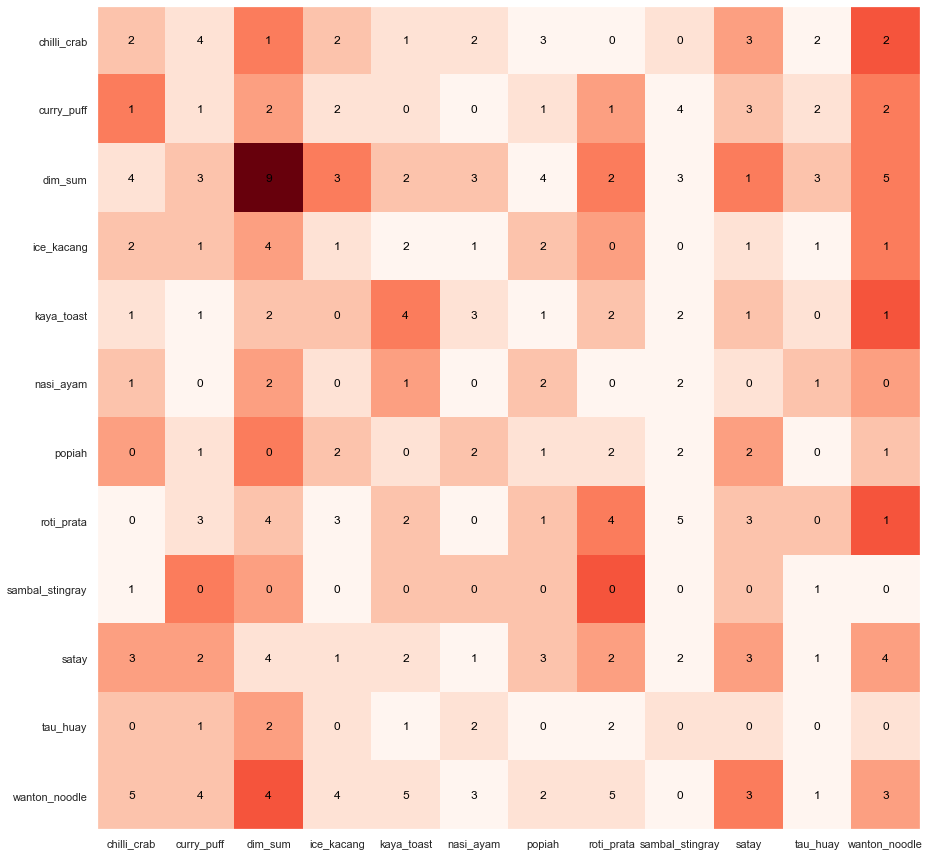

In [48]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1)
conf_mat = confusion_matrix(test_class,predict2_class)
#sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=0.05,cmap="Reds",fmt="3.0f")
im=ax.imshow(conf_mat,cmap="Reds")
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_xticklabels(food_items)
ax.set_yticklabels(food_items)
ax.grid(False)

for i in range(12):
    for j in range(12):
        text = ax.text(i, j, conf_mat[i, j],
                       ha="center", va="center", color="black",fontsize="large")
fig.tight_layout()        
plt.show()

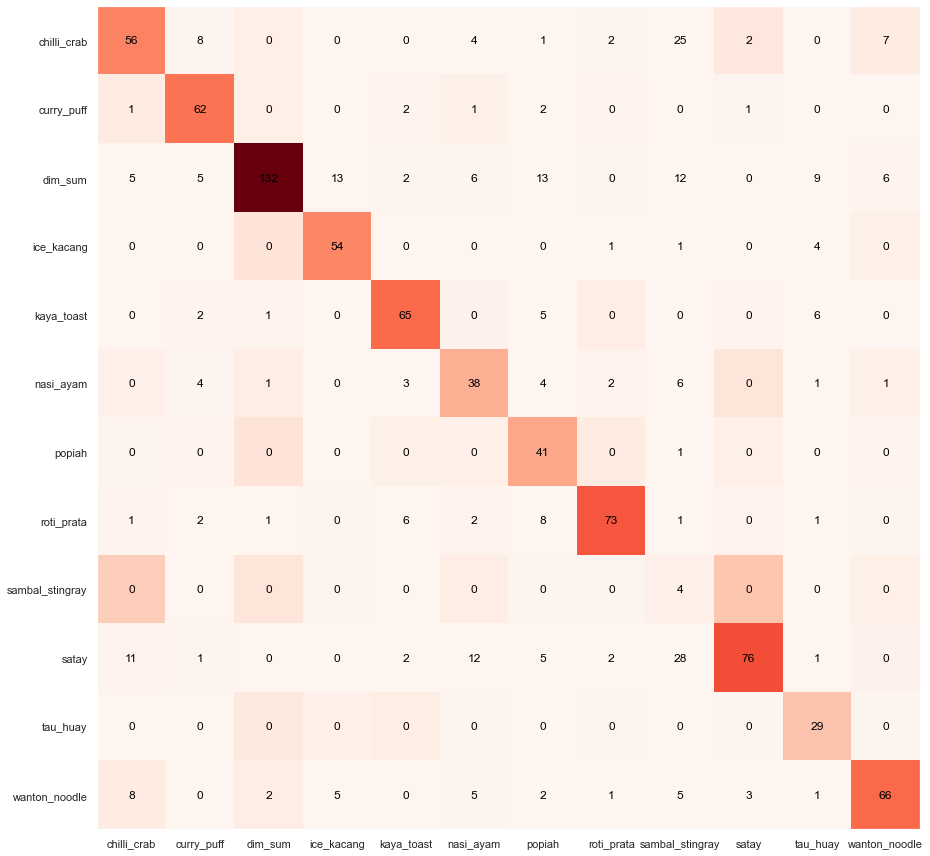

In [49]:
predict_train2=model2.predict(train_gen2,steps=len(train_gen2))
predict_class_train2=[np.argmax(y) for y in predict_train2]
#train2_set_total=len(train_gen2.filenames)
#number_of_generator_calls_train2 = math.ceil(train2_set_total / (BATCH_SIZE))
train2_labels = []
for i in range(len(train_gen2)):
    train2_labels.extend(np.array(train_gen2[i][1]))
train2_labels=np.array(train2_labels)
train2_class=[np.argmax(y) for y in train2_labels]
confusion_matrix(train2_class, predict_class_train2)


fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1)
conf_mat = confusion_matrix(train2_class, predict_class_train2)
#sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=0.05,cmap="Reds",fmt="3.0f")
im=ax.imshow(conf_mat,cmap="Reds")
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_xticklabels(food_items)
ax.set_yticklabels(food_items)
ax.grid(False)

for i in range(12):
    for j in range(12):
        text = ax.text(i, j, conf_mat[i, j],
                       ha="center", va="center", color="black",fontsize="large")
fig.tight_layout()        
plt.show()

#### Further improve model by generating more images using data augmentation (5000 training, 1244 testing images)

In [4]:
data_dir2="./data/tensorfood"

In [5]:
optimizer=tf.keras.optimizers.RMSprop(lr=0.01)
early_stop=[EarlyStopping(monitor="val_loss",min_delta=1e-2,patience=10)]

In [8]:
datagen3_train=image.ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  #horizontal_flip=True,
                                  #vertical_flip=True,
                                  preprocessing_function=cut_out,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  validation_split=VALIDATION_SPLIT)

train_gen3=datagen3_train.flow_from_directory(data_dir2,
                                  target_size=(224,224),
                                  subset="training",
                                  batch_size=BATCH_SIZE,
                                  shuffle=True,
                                  class_mode="categorical",
                                  seed=2224,
                                  save_to_dir="./data/augmented_image",
                                  save_prefix="aug",
                                  save_format="jpeg")# saving to dir saved the augmented images to local
                                  
datagen3_test=image.ImageDataGenerator(rescale=1./255,
                                       validation_split=VALIDATION_SPLIT)                                 

test_gen3=datagen3_test.flow_from_directory(data_dir2,
                                 target_size=(224,224),
                                 subset="validation",
                                 batch_size=BATCH_SIZE,
                                 class_mode="categorical",
                                 shuffle=True,
                                 seed=2224
                                 )

Found 5000 images belonging to 12 classes.
Found 1244 images belonging to 12 classes.


In [9]:
base_model3=ResNet50V2(include_top=False,weights="imagenet",input_shape=(224,224,3))
pool_3=GlobalAveragePooling2D()(base_model3.layers[-1].output)
fc2_3=Dense(512,activation="relu")(pool_3)
output_3=Dense(12,activation="softmax")(fc2_3)
model3=Model(inputs=base_model3.input,outputs=output_3)
base_model3.trainable = False


In [10]:
model3.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In [11]:
history3 = model3.fit(train_gen3,
                   steps_per_epoch=len(train_gen3),
                   epochs=EPOCHS,
                   validation_data=test_gen3,
                   validation_steps=len(test_gen3),
                   callbacks=early_stop)

Train for 625 steps, validate for 156 steps
Epoch 1/20
625/625 [==============================] - 964s 2s/step - loss: 2.3196 - accuracy: 0.4708 - val_loss: 3.2805 - val_accuracy: 0.5973
Epoch 2/20
625/625 [==============================] - 944s 2s/step - loss: 1.4685 - accuracy: 0.6074 - val_loss: 2.4261 - val_accuracy: 0.7082
Epoch 3/20
625/625 [==============================] - 936s 1s/step - loss: 1.3479 - accuracy: 0.6546 - val_loss: 3.6379 - val_accuracy: 0.6857
Epoch 4/20
625/625 [==============================] - 956s 2s/step - loss: 1.3873 - accuracy: 0.6736 - val_loss: 4.7419 - val_accuracy: 0.6929
Epoch 5/20
625/625 [==============================] - 943s 2s/step - loss: 1.3724 - accuracy: 0.6764 - val_loss: 4.6793 - val_accuracy: 0.7106
Epoch 6/20
625/625 [==============================] - 947s 2s/step - loss: 1.3738 - accuracy: 0.6908 - val_loss: 7.0976 - val_accuracy: 0.6656
Epoch 7/20
625/625 [==============================] - 961s 2s/step - loss: 1.4067 - accuracy: 0.68

In [12]:
predict3=model3.predict(test_gen3,steps=len(test_gen3))
predict3_class=[np.argmax(y) for y in predict3]

test3_labels = []
for i in range(len(test_gen3)):
    test3_labels.extend(np.array(test_gen3[i][1]))
test3_labels=np.array(test3_labels)
test3_class=[np.argmax(y) for y in test3_labels]
confusion_matrix(test3_class, predict3_class)

array([[ 91,   0,   4,   0,   0,   1,   0,   0,   0,   0,   0,   7],
       [ 11,  75,  10,   0,   0,   3,   2,   2,   0,   0,   0,   3],
       [  1,   0, 170,   0,   1,   1,   0,   0,   0,   0,   0,   1],
       [  0,   1,  15,  65,   2,   2,   0,   0,   0,   0,   0,   6],
       [  5,   1,   1,   0,  88,   1,   1,   4,   0,   0,   0,   0],
       [ 26,   2,   5,   0,   0,  37,   0,   6,   0,   1,   0,  10],
       [  3,   1,  10,   0,   4,   6,  71,   4,   0,   0,   0,   4],
       [  4,   0,   7,   1,   1,   3,   0,  85,   0,   0,   0,   2],
       [ 32,   0,   5,   0,   0,  18,   0,   0,  37,   2,   0,  11],
       [ 26,   0,   5,   0,   0,   6,   0,   0,   0,  58,   0,   9],
       [  0,   0,  15,   0,  14,   3,   0,   0,   0,   0,  34,   0],
       [  8,   0,   3,   0,   0,   1,   0,   0,   0,   0,   0,  89]],
      dtype=int64)

In [13]:
print(classification_report(test3_class, predict3_class))

              precision    recall  f1-score   support

           0       0.44      0.88      0.59       103
           1       0.94      0.71      0.81       106
           2       0.68      0.98      0.80       174
           3       0.98      0.71      0.83        91
           4       0.80      0.87      0.83       101
           5       0.45      0.43      0.44        87
           6       0.96      0.69      0.80       103
           7       0.84      0.83      0.83       103
           8       1.00      0.35      0.52       105
           9       0.95      0.56      0.70       104
          10       1.00      0.52      0.68        66
          11       0.63      0.88      0.73       101

    accuracy                           0.72      1244
   macro avg       0.81      0.70      0.71      1244
weighted avg       0.80      0.72      0.72      1244



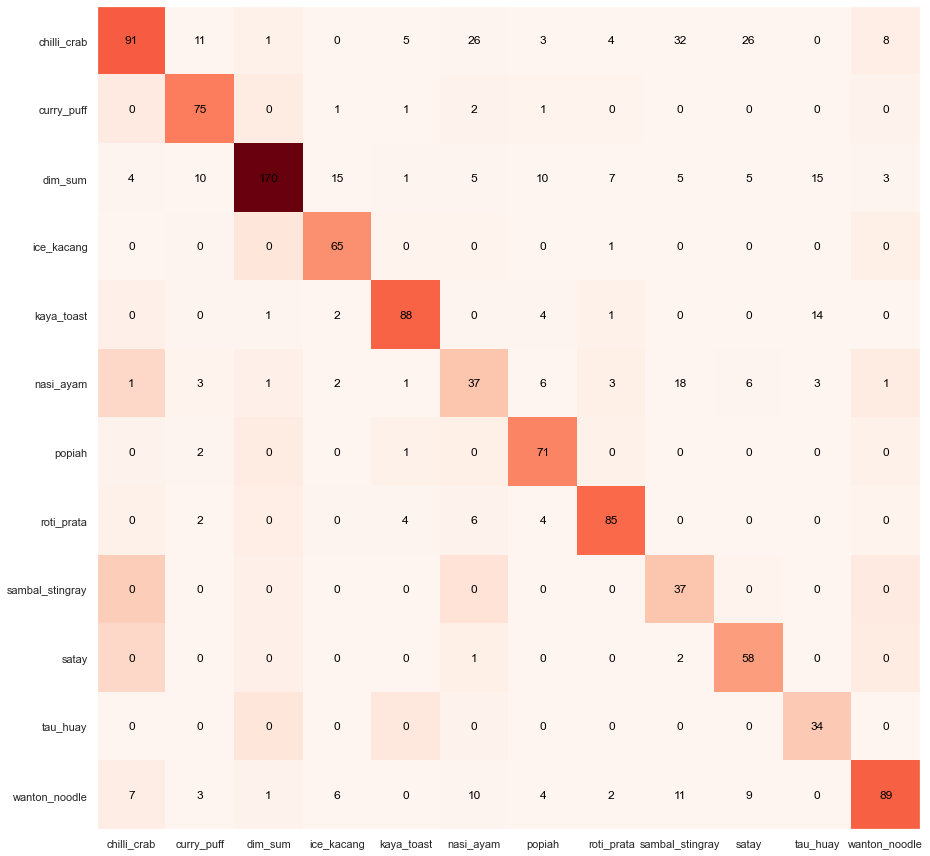

In [20]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(1,1,1)
conf_mat = confusion_matrix(test3_class, predict3_class)
#sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=0.05,cmap="Reds",fmt="3.0f")
im=ax.imshow(conf_mat,cmap="Reds")
ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
ax.set_xticklabels(food_items)
ax.set_yticklabels(food_items)
ax.grid(False)

for i in range(12):
    for j in range(12):
        text = ax.text(i, j, conf_mat[i, j],
                       ha="center", va="center", color="black",fontsize="large")
fig.tight_layout()        
plt.show()

#### Finally save the best model as .h5 format to be used 

In [21]:
model3.save("model.h5")